In [44]:
pip install numpy pandas scikit-learn matplotlib nltk seaborn wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
df = pd.read_csv('spam.csv', encoding='latin-1') #using latin-1 for proper encoding
df.sample(10)
#df.shape

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g...",NaN,NaN,NaN
3625,ham,Yeah right! I'll bring my tape measure fri!,NaN,NaN,NaN
5404,ham,Pls give her prometazine syrup. 5mls then &lt...,NaN,NaN,NaN
1243,ham,No shoot me. I'm in the docs waiting room. :/,NaN,NaN,NaN
1658,spam,RGENT! This is the 2nd attempt to contact U!U ...,NaN,NaN,NaN
1759,ham,Do u ever get a song stuck in your head for no...,NaN,NaN,NaN
677,ham,"Piggy, r u awake? I bet u're still sleeping. I...",NaN,NaN,NaN
1659,ham,"Yeah, where's your class at?",NaN,NaN,NaN
2606,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...,NaN,NaN,NaN
2734,ham,Can you do a mag meeting this avo at some point?,NaN,NaN,NaN


Data Cleaning

In [49]:
#df.info()
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
#df.sample(10)

#Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [50]:
df['target'] = encoder.fit_transform(df['target']) #ham 0, spam 1
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
#df.isnull().sum()

In [52]:
#df.duplicated().sum() #403 duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum() #0 duplicate values
#df.shape

np.int64(0)

Exploratory Data Analysis

In [53]:
df['target'] .value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x297b5a47610>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

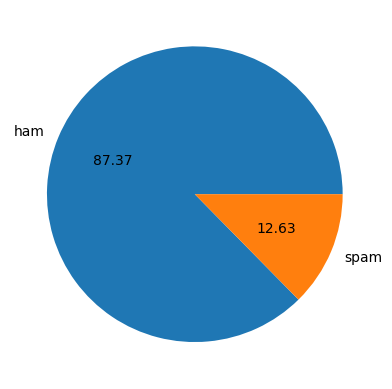

In [54]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
#Imbalanced dataset

In [55]:
df['num_char'] = df['text'].apply(len)
df['num_words'] =  df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
#df.head()

In [56]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
df[df['target'] == 0] [['num_char', 'num_words', 'num_sentences']].describe() #ham

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
df[df['target'] == 1] [['num_char', 'num_words', 'num_sentences']].describe() #spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

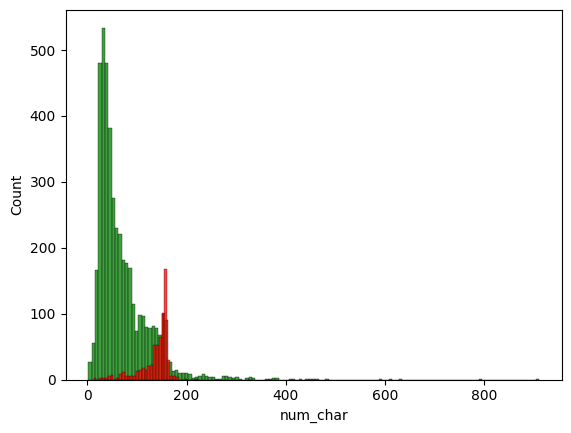

In [59]:
#Graphical view for ham/spam
sns.histplot(df[df['target'] == 0]['num_char'], color='green')
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

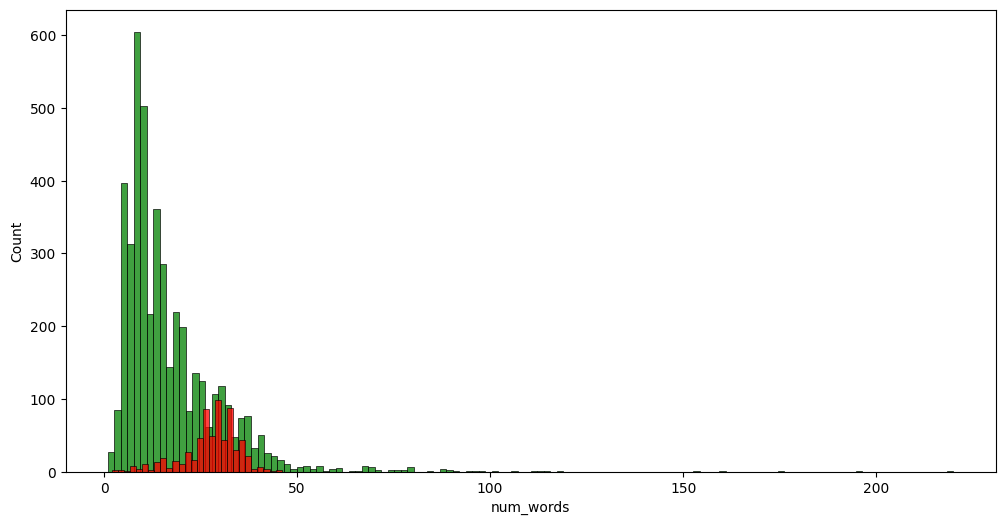

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

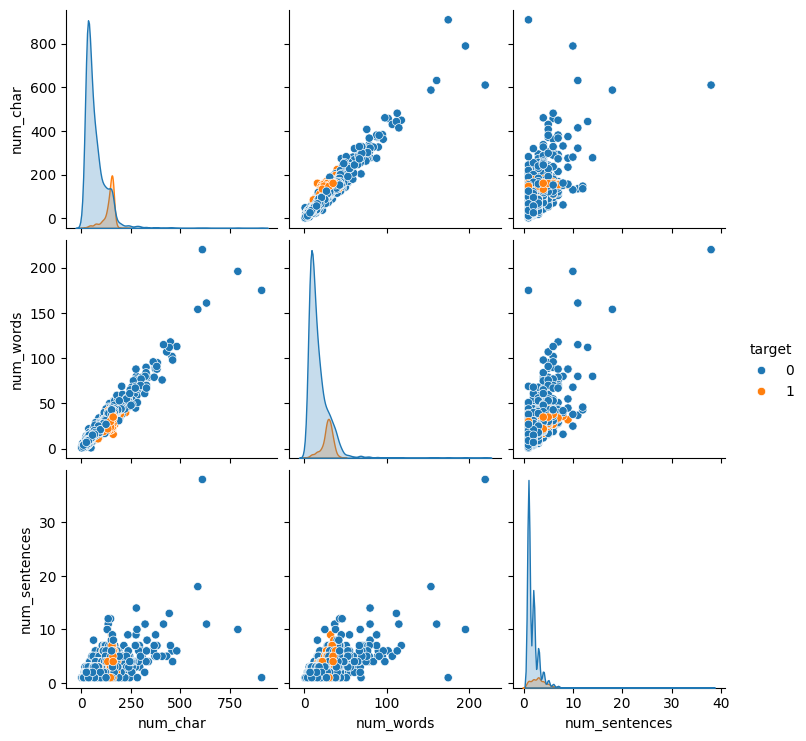

In [61]:
#Advanced visualization for graphical view
sns.pairplot(df, hue='target')

<Axes: >

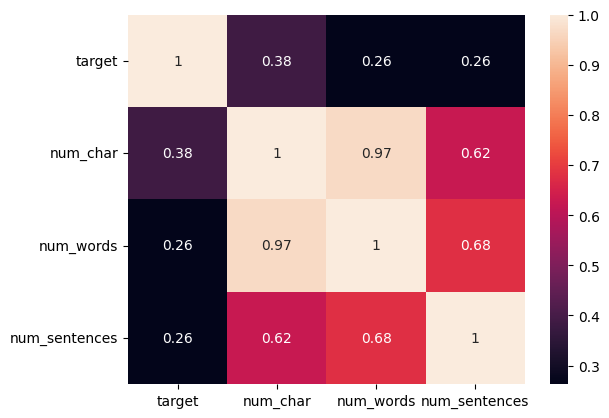

In [62]:
#Numeric column correlation
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True) 

Text Preprocessing

In [63]:
def transform_text(text):
    #Lowering case
    text = text.lower()
    
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #Removing special characters
    c = []
    for char in text:
        if char.isalnum(): c.append(char)
    
    #Removing stop words and punctuation
    from nltk.corpus import stopwords
    from string import punctuation
    text = c[:]
    c.clear()
    for char in text:
        if char not in stopwords.words('english') and char not in punctuation:
            c.append(char)
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    text = c[:]
    c.clear()
    for char in text:
        c.append(ps.stem(char))
    return " ".join(c)


In [64]:
transform_text('Hello friends, how are you doing today? I am doing fine!')

'hello friend today fine'

In [65]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Word Visibility

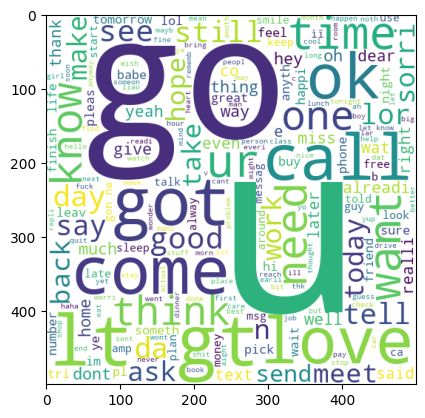

In [66]:
from wordcloud import WordCloud
#Ham word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

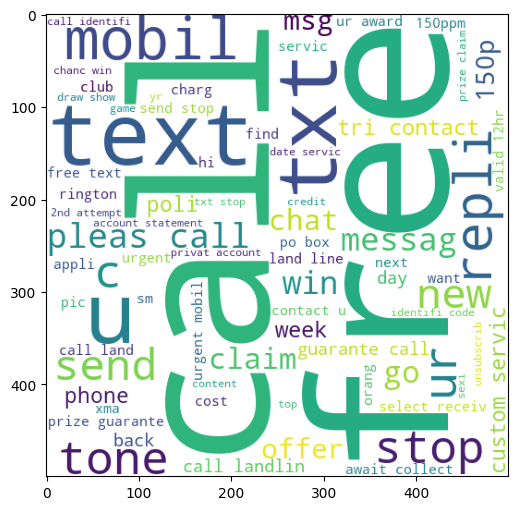

In [67]:
#Spam word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [68]:
#Spam messages list
from collections import Counter

spam_list = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_list.append(words)
#len(spam_list)
Counter(spam_list).most_common(10) #Most common spam words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

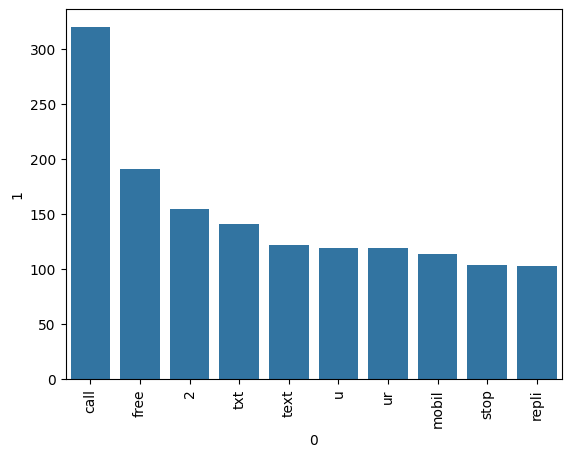

In [74]:
#Top 10 spam words visualization
sns.barplot(x=pd.DataFrame(Counter(spam_list).most_common(10))[0], 
            y=pd.DataFrame(Counter(spam_list).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

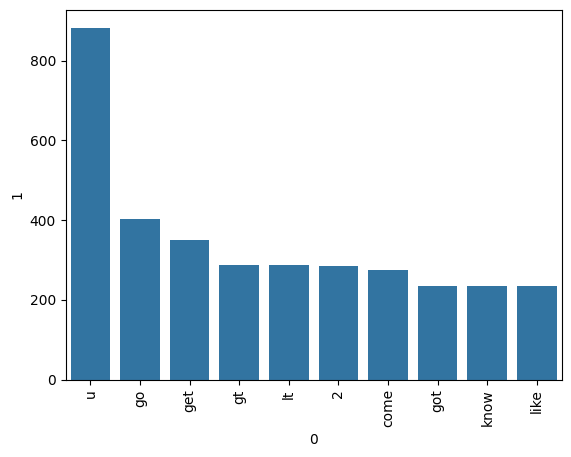

In [78]:
ham_list = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_list.append(words)

Counter(ham_list).most_common(10) #Most common ham words
sns.barplot(x=pd.DataFrame(Counter(ham_list).most_common(10))[0], 
            y=pd.DataFrame(Counter(ham_list).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()